## To Do ##

- handle distances consistently
- sky plots to show areal coverage of plots
```
We have a map comparing sky positions for a100 and GSWLC, but not for the other catalogs.  I think we wanted to make those also.  Could you do it?  (If you’re too busy, one of us could do it.)
```
- match RA and DEC of galaxy zoo to a100-sdss and to gswlc catalog
- split Table 2 into Table 2 and 3
- Are there csv versions of the tables for the figure somewhere?  That would also us to make small changes, like modifying the number of digits.
- In Figure 4, the left panel should be color versus mass, like the others.
- We should add more text about the matches to WISE.  You know the most about this, so you should make sure that what we say is correct. 


## Finished ##
- Figure for color-stellar mass for GSWLC in the same format as the others (Note from Adriana: Watch out for null values of -999 in GSWLC.)
- Figure for comparison of stellar masses in different catalogs
- Draft version of final catalog?
- Figure for specific star formation rate versus stellar mass for GSWLC compared with a100-GSWLC
- KS tests to compare histograms in color and stellar mass.
- Figure 1 needs an x-axis label
  - this was in the code, just cut off
  - adjusted bottom so it shows
- make sSFR vs color the right side of Fig 6
- The legends in some figures could be moved show the graphs better. 
  - switched them all to 'upper left'.  I think this works across the board.

https://python-graph-gallery.com/134-how-to-avoid-overplotting-with-python/
http://cxhernandez.com/tutorials/dataviz/2014/11/19/jointplot-d3.html

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astropy.io import fits

# To Generate Catalogs #

- the catalogs are created by **match_catalogs.py**


## Notes ##
- NSA abs mags are for H0=100 - do we correct for this when calculating Taylor stellar mass (should be H0=70)

### Ingesting GSWLC ###

- downloaded catalog gswlc-A2 (640,659 objects)
  - http://pages.iu.edu/~salims/gswlc/
  - unzip
```
gunzip GSWLC-A2.dat.gz 
```

  - created a header string (file doesn't have header) http://pages.iu.edu/~salims/gswlc/table2.pdf
```
# objide glxid plate mjd fiberid ra dec z chisq logmass e_logmass logsfr e_logsfr afuv e_afuv ab e_ab av e_av flag_sed uv_servey flag_uv flag_midir flag_mgs
```

  - read into topcat as an ascii file
- downloaded Adriana's catalog with SDSS photometry and errors 
  - https://drive.google.com/drive/folders/1P3ooZ5euqK8DvpsgT_2b5eOgtma6XT0-
  - Table_sdss_GSWLC_adurbala_AD.csv
  
- matched tables in topcat according to Adriana's directions
  - Sky match (RA, DEC), 0.5" error
     - RA,DEC in GSWLC catalog
     - radeg, decdeg in Adriana's catalog
  - found match for every galaxy - phew
  - output is gswlc-A2-sdssphot.fits (format just fits)

  
  
  

In [2]:
# I se the make_a100sdss=True in match_catalogs.py
%run match_catalogs.py

/home/rfinn/github/APPSS/match_catalogs.py:79: RuntimeWarning: divide by zero encountered in log10
  G_Shao = self.a100sdss['absMag_g']  -(1.68*np.log10(ba))
/home/rfinn/github/APPSS/match_catalogs.py:80: RuntimeWarning: divide by zero encountered in log10
  I_Shao = self.a100sdss['absMag_i']  -(1.08*np.log10(ba))
/home/rfinn/github/APPSS/match_catalogs.py:82: RuntimeWarning: divide by zero encountered in log10
  - (self.a100sdss['modelMag_i'] -self.a100sdss['extinction_i']-1.08*np.log10(ba))


################################

MATCHING TO NSA 

################################
FULL CATALOGS, BEFORE MATCHING
total number in A100 =  31501
total number in NSA =  641409
AFTER MATCHING
total number in A100 =  31501
total number in NSA =  641409
number of unique galaxies =  650050
number of matches between A100 and NSA =  22860
number in A100 but not in NSA =  8641
number in NSA but not in A100 =  618549

OVERLAP VOLUME, BEFORE MATCHING
total number in A100 =  15467
total number in NSA =  42999

OVERLAP VOLUME, AFTER MATCHING
total number in A100 =  15467
total number in NSA =  42999
number of unique galaxies =  44919
number of matches between A100 and NSA =  13547
number in A100 but not in NSA =  1920
number in NSA but not in A100 =  29452
################################

MATCHING TO GSWLC-A2 

################################


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Paper Plots #

- the code to generate paper plots is in **a100sdss.py**

In [8]:
%run a100sdss.py

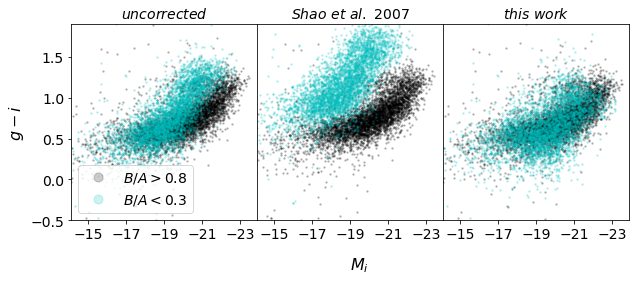

In [9]:
p.figure1()

/home/rfinn/github/APPSS/a100sdss.py:71: RuntimeWarning: invalid value encountered in greater_equal
  keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
/home/rfinn/github/APPSS/a100sdss.py:71: RuntimeWarning: invalid value encountered in less_equal
  keepflag2 = (x2 >= xmin) & (x2 <= xmax) & (y2 >= ymin) & (y2 <= ymax)
/home/rfinn/github/APPSS/a100sdss.py:93: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour((H.T), levels=ncontour_levels, extent = extent, zorder=1,colors=color2, label='__nolegend__')
/home/rfinn/github/APPSS/a100sdss.py:110: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  t = plt.hist(x1, normed=True, bins=nhistbin,color='k',histtype='step',lw=1.5, label=name1)
/home/rfinn/github/APPSS/a100sdss.py:111: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instea

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.86e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.33
p-value = 0.00e+00 (prob that samples are from same distribution)


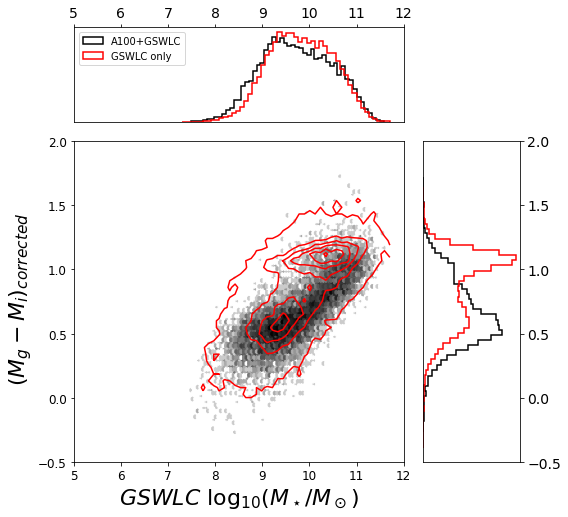

In [10]:
t = p.figa_gswlc()

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.72e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.28
p-value = 0.00e+00 (prob that samples are from same distribution)


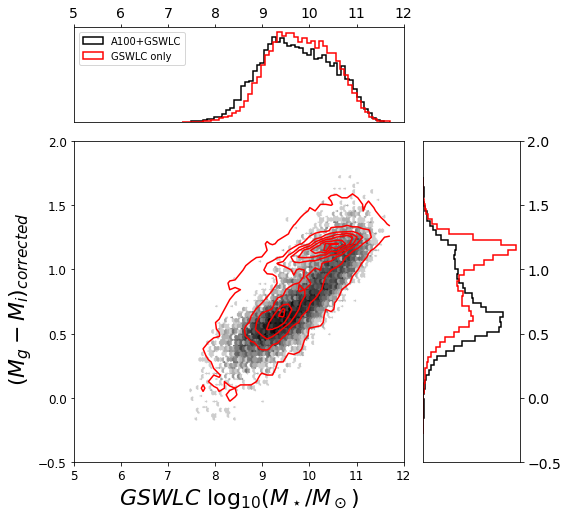

In [57]:
t = p.figa_gswlc()

4300 4300
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.38
p-value = 0.00e+00 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.21
p-value = 1.06e-116 (prob that samples are from same distribution)


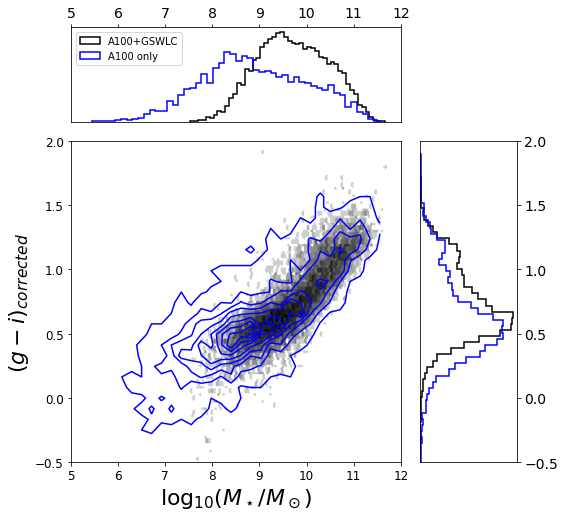

In [58]:
t = p.figb_gswlc()

number of galaxies in NSA + A100 sample =  13119
28318 28318
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.06
p-value = 4.90e-33 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.27
p-value = 0.00e+00 (prob that samples are from same distribution)


array([ True,  True,  True, ..., False, False, False])

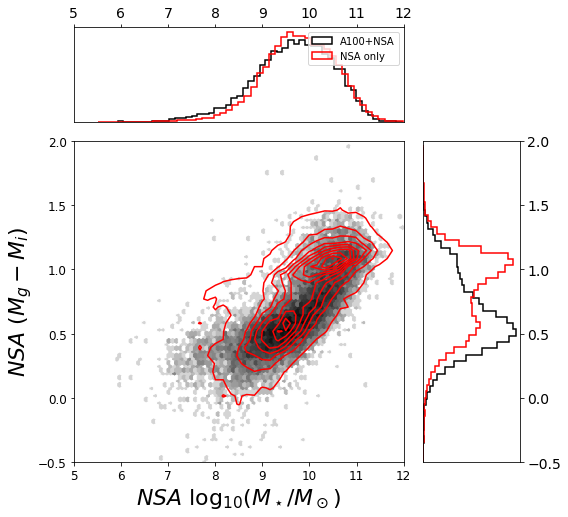

In [59]:
p.figa_nsa()


1427 1427
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.45
p-value = 1.76e-223 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.34
p-value = 5.86e-127 (prob that samples are from same distribution)


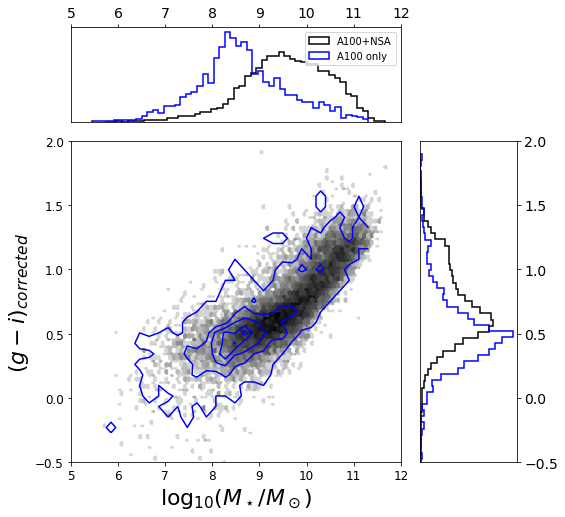

In [60]:
p.figb_nsa()

number with both =  537
number with S4G only =  64
64 64
[  1.  10.  19.  28.  37.  46.  55.  64.  73.  82.  91. 100.]
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.26
p-value = 1.65e-02 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.68
p-value = 6.66e-16 (prob that samples are from same distribution)


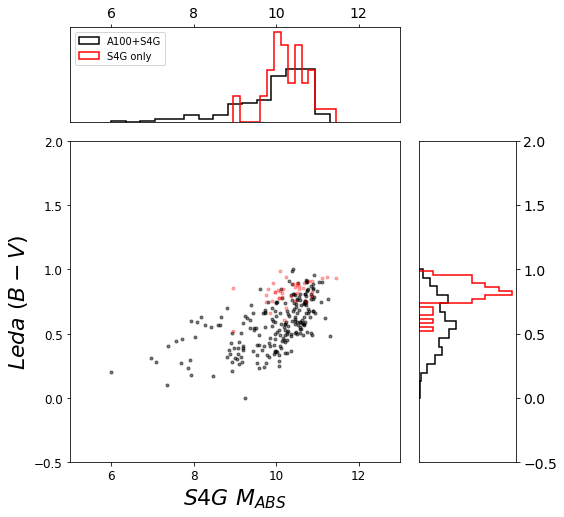

In [61]:
p.figa_s4g()


[  2.  20.  38.  56.  74.  92. 110. 128. 146. 164. 182. 200.]
############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.15
p-value = 7.50e-09 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.18
p-value = 5.74e-13 (prob that samples are from same distribution)


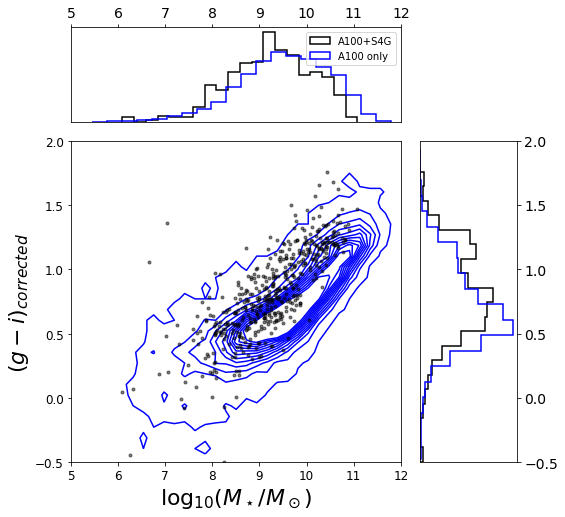

In [62]:
p.figb_s4g()

## Comparison of Stellar Mass Estimates ##

### Taylor stellar mass ###
- need to review what distances we are using for each dataset

<Figure size 432x288 with 0 Axes>

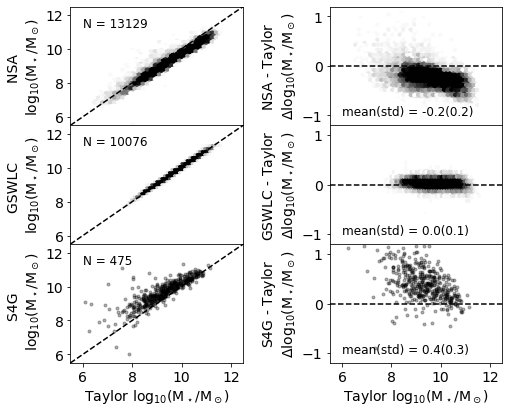

In [49]:
%run a100sdss.py
p.mstar()

## sSFR ##

- plot sSFR vs sellar mass for S4G+A100 sample vs A100

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.07
p-value = 1.77e-34 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.24
p-value = 0.00e+00 (prob that samples are from same distribution)


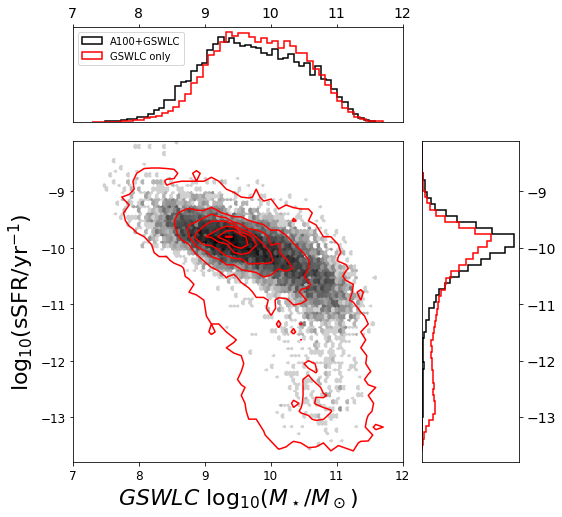

In [65]:
t = p.ssfrmstar()

############################################################# 
KS test comparising galaxies within range shown on the plot

STELLAR MASS
KS Test (median of bootstrap):
D =   0.28
p-value = 0.00e+00 (prob that samples are from same distribution)

COLOR
KS Test (median of bootstrap):
D =   0.24
p-value = 0.00e+00 (prob that samples are from same distribution)


<Figure size 432x288 with 0 Axes>

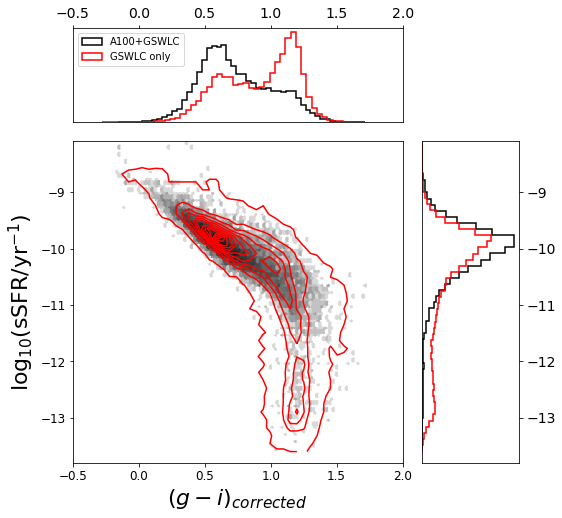

In [66]:
%run a100sdss.py
t = p.ssfrcolor()

## sSFR vs HI Frac ##



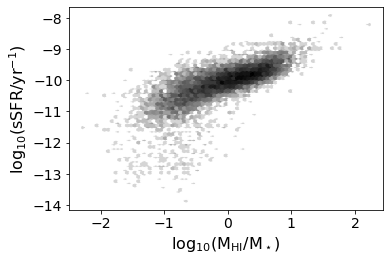

In [67]:
t = p.ssfrHIfrac()

## Skyplot showing distribution of various surveys ##

http://learn.astropy.org/plot-catalog.html

* I want to make a figure that shows the sky coverage of the surveys that we are comparing

```
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
```

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

# Incorporating unWISE #

Dustin Lang provided catalog of matched unWISE sources

- 219 galaxies are matched to multiple unWISE sources
- 1 galaxies is matched to 3 sources (the rest are matched to 2)

I matched the Lang catalog to a100-sdss in match_catalogs.




In [19]:
%run ~/github/APPSS/match_catalogs.py

--- 3.0592589378356934 seconds ---


In [3]:
cat = fits.getdata('/Users/rfinn/github/APPSS/tables/a100-sdss-wise.fits')

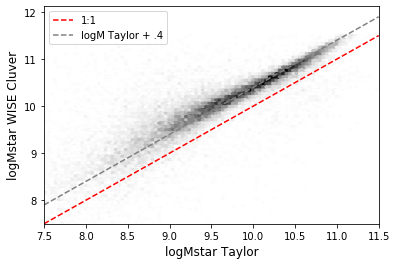

In [4]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarWise']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar WISE Cluver',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.4,'r--',c='.5',label='logM Taylor + .4')
plt.legend()
plt.savefig('WISE-Cluver-vs-Taylor.png')

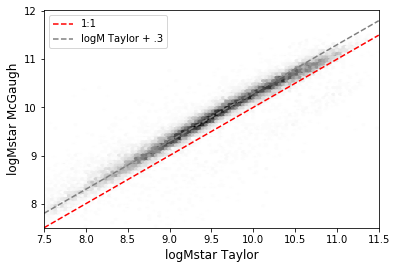

In [5]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarMcGaugh']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar McGaugh',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.3,'r--',c='.5',label='logM Taylor + .3')
plt.legend()
plt.savefig('WISE-McGaugh-vs-Taylor.png')

number of WISE detections =  21815


Text(0.2, 1, 'AGN')

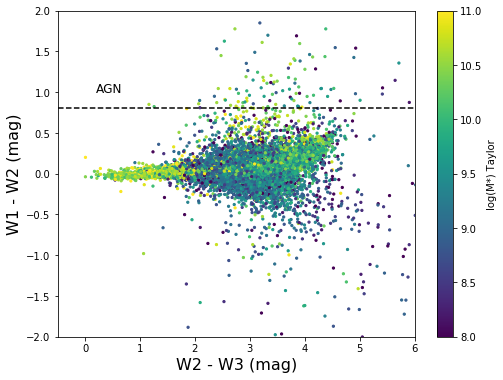

In [6]:
plt.figure(figsize=(8,6))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (cat['w1_nanomaggies'] > 0) & (cat['w2_nanomaggies'] > 0) & (cat['w3_nanomaggies'] > 0) #& (cat['w4_nanomaggies'] > 0)
flag = w3snr > 3
print('number of WISE detections = ', sum(flag))
x = cat['w2_mag'] - cat['w3_mag']
y = cat['w1_mag'] - cat['w2_mag']
plt.scatter(x[flag],y[flag],c = cat['logMstarTaylor'][flag],s=5,vmin=8,vmax=11)
plt.axhline(y=.8,ls='--',color='k')
plt.colorbar(label='log(M*) Taylor')
plt.xlabel('W2 - W3 (mag)',fontsize=16)
plt.ylabel('W1 - W2 (mag)',fontsize=16)
plt.axis([-.5,6,-2,2])
plt.text(.2,1,'AGN',fontsize=12)

In [7]:
unique, counts = np.unique(cat['AGC'],return_counts=True)
print('number of AGC with multiple unWISE matches = ',sum(counts > 1))
print('')
print('AGC number of sources with multiple unWISE matches = ')
print(unique[counts > 1])

number of AGC with multiple unWISE matches =  219

AGC number of sources with multiple unWISE matches = 
[   231    433    669    852   1159   1226   1276   1553   2441   4034
   4548   4655   5020   5078   5431   5522   5844   5898   6195   6300
   6841   7113   7170   7547   7597   8165   9180   9266   9738   9991
  12110  12300  12340  12497  12612  12624 100352 101194 101833 101962
 101966 102797 102892 103006 105057 105414 110112 110465 111812 112459
 113509 113918 113922 113929 114496 114730 115281 115993 121130 121457
 122701 122811 123940 124091 132368 171688 171869 172251 172836 181913
 181925 182630 182865 184611 188742 188842 188861 188964 188994 190347
 192673 193780 193866 198484 198565 200878 202240 203860 203874 205138
 208559 208867 211006 211174 212162 213175 213312 214062 214730 215218
 216597 217497 220432 220616 220863 220865 221514 222214 222671 224145
 224236 224405 226004 226049 226606 226914 227962 229200 231904 231991
 232151 232158 232162 232461 232643 233386 

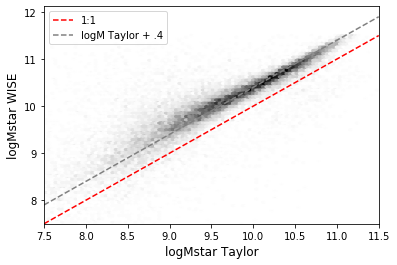

In [8]:
plt.figure(figsize=(6,4))
w1snr = np.abs(cat['w1_nanomaggies']*np.sqrt(cat['w1_nanomaggies_ivar']))
flag = w1snr > 5
x = cat['logMstarTaylor']
y = cat['logMstarWise']
#plt.plot(x[flag],y[flag],'k.')
xmin=7.5
xmax=11.5
plt.hexbin(x[flag],y[flag],extent=[xmin,xmax,xmin,xmax],cmap='gray_r')
plt.xlabel('logMstar Taylor',fontsize=12)
plt.ylabel('logMstar WISE',fontsize=12)
xl = np.linspace(xmin,xmax,100)
plt.plot(xl,xl,'r--',label='1:1')
plt.plot(xl,xl+.4,'r--',c='.5',label='logM Taylor + .4')
plt.legend()


In [9]:
print(10.**.4)
print(1/.7**2)

2.51188643150958
2.0408163265306127


* WISE stellar masses are 0.4 dex (or a factor of 2.5) larger than Taylor stellar mass we calculate from SDSS colors.
* is my solar luminosity off by a magnitude?





Text(0, 0.5, 'logSFR W3')

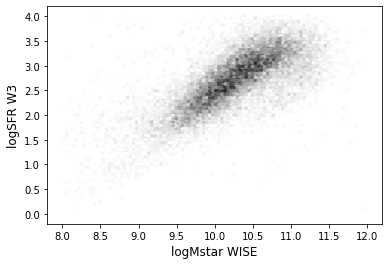

In [10]:
plt.figure(figsize=(6,4))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (w1snr > 5) & (w3snr > 5)
y = cat['logSFR12']
x = cat['logMstarWise']
#plt.plot(x[flag],y[flag],'k.')
plt.hexbin(x[flag],y[flag],extent=[8,12,0,4],cmap='gray_r')
plt.xlabel('logMstar WISE',fontsize=12)
plt.ylabel('logSFR W3',fontsize=12)
#xl = np.linspace(5,12,100)
#plt.plot(xl,xl,'r--')

Text(0, 0.5, 'logSFR W3')

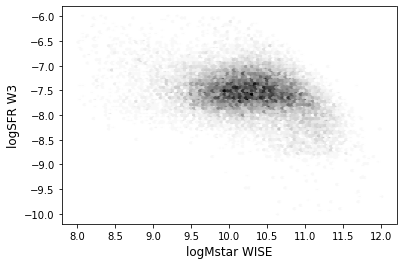

In [16]:
#sSFR vs Mstar
plt.figure(figsize=(6,4))
w3snr = np.abs(cat['w3_nanomaggies']*np.sqrt(cat['w3_nanomaggies_ivar']))
flag = (w1snr > 5) & (w3snr > 5)
y = cat['logSFR12']
x = cat['logMstarWise']
y = y-x
#plt.plot(x[flag],y[flag],'k.')
#plt.hexbin(x[flag],y[flag],extent=[8,12,0,4],cmap='gray_r')
plt.hexbin(x[flag],y[flag],extent=[8,12,-10,-6],cmap='gray_r')
plt.xlabel('logMstar WISE',fontsize=12)
plt.ylabel('logSFR W3',fontsize=12)
#xl = np.linspace(5,12,100)
#plt.plot(xl,xl,'r--')

# Comparing Martha and Mary's Catalogs #

* Martha's A100 catalog has 31503 sources.
* Mary's catalog has 31502 sources.
* Mary's catalog has one fewer source.

Going to use Mary's catalog because it has the AGC columns appended already.

In [142]:
### OLD STUFF FROM WHEN I WAS MAKING MY OWN CUTS
# just overlap regions
'a100-nsa_overlapregion-mco.fits'
'a100-s4g_overlapregion-mco.fits'
agc_path = '/Users/rfinn/github/APPSS/tables/'


#a100
agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
#agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
mh_agc = ascii.read(agc_name)

#a100
#agc_name = agc_path+'a100.code12.SDSSvalues190516.csv'
agc_name = agc_path+'a100-SDSS-catalog-mco190725.fits'
agc = fits.getdata(agc_name,1)

# nsa
nsa_path = '/Users/rfinn/research/NSA/'
nsa_name = nsa_path+'nsa_v0_1_2.fits'
nsa = fits.getdata(nsa_name)
nsa_gi = nsa['ABSMAG'][:,3] - nsa['ABSMAG'][:,5]
h=.7
nsa_logstellarmassTaylor=1.15+0.70*(nsa['ABSMAG'][:,3]-nsa['ABSMAG'][:,5]) -0.4*(nsa['ABSMAG'][:,5]+ 5.*np.log10(h))

In [17]:
print(len(mh_agc),len(agc))

31503 31502


In [204]:
# define flag for keeping both samples
ramin = 120.
ramax = 240.
decmin = 0.
decmax = 36.
zmax = 0.05
ra = agc['ra']
dec = agc['dec']
redshift = agc['Vhelio']/c.c.value
keepagc = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & (agc['modelMagErr_g'] < .01) & (agc['modelMagErr_i'] < .01)

# repeat for NSA
ra = nsa['RA']
dec = nsa['DEC']
redshift = nsa['ZDIST']

nsamagflag = (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,3])) < .1) & (2.5*np.log10(np.sqrt(nsa['NMGY_IVAR'][:,5])) < .1)
nsamagflag = (nsa['NMGY'][:,3]/nsa['NMGY_IVAR'][:,3] > 20.) & (nsa['NMGY'][:,5]/nsa['NMGY_IVAR'][:,5] > 20.)
keepnsa = (ra > ramin) & (ra < ramax) & (dec > decmin) & (dec < decmax) & (redshift < .05) & nsamagflag & (nsa_gi > -1) & (nsa_gi < 2.5)



//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in 

### Plot g-i corrected vs stellar mass ###

In [ ]:
# from my original plot
# central panel
x1 = agc['LogMstarTaylor'][keepagc]
y1 = agc['gmi_corrected'][keepagc]
x2 = nsa_logstellarmassTaylor[keepnsa]
y2 = nsa_gi[keepnsa]
colormass(x1,y1,x2,y2,'colormass-myversion.png')

Text(336.971,0.5,'$(g-i)_{corrected} $')

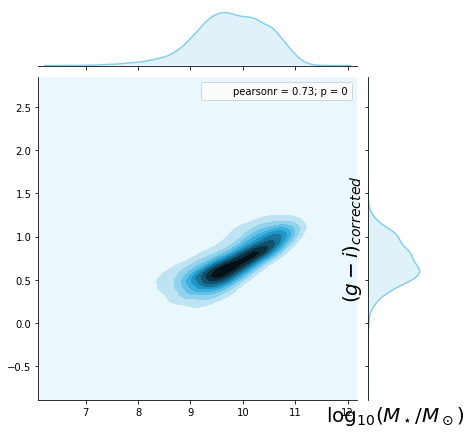

In [217]:
sns.jointplot(x=agc['LogMstarTaylor'][keepagc], y=agc['gmi_corrected'][keepagc], kind='kde', color="skyblue")
plt.xlabel('$\log_{10}(M_\star/M_\odot) $',fontsize=20)
plt.ylabel('$(g-i)_{corrected} $',fontsize=20)